![](./img/practica7/5abc.png)

**a )**

> | Estimadores |
> |---|
> |$$\huge \hat \theta_m = \hat \theta_{MV} = \bar X = \frac {\sum_{i=1}^n X_i} n$$|

**b )**

Sabiendo que la distribución de las $X_i$ es $Poisson(\theta)$, podemos usar la función de probabilidad puntual de la misma, reemplazando $\theta$ por $\hat \theta_m$

> PMF: **Poisson ($\theta$)**
>
> $$\large P( X = x ) = \frac{\theta^x}{x!} e^{-\theta}$$

Para $X=40$

> $$\large P( X = 40 ) = \frac{\theta^{\, 40}}{40!} e^{-\theta}$$

A modo de procedimiento *plug in*, uso parámetro $\hat \theta_m$ estimado:



> | Estimador de $p_X(40)$ |
> |---|
> |$$\huge \hat P_m( X = 40 ) = \frac{\hat \theta_m^{\, 40}}{40!} e^{-\hat \theta_m}$$|

**c )** Si no conociera la distribución de las $X_i$, puedo aproximar la distribución por una binomial con probabilidad $p$ estimada con los datos:

> PMF Binomial(n,p)
>
> $$\large P(X=k) = {n \choose k} p^k (1 - p)^{n-k}$$


Ahora 

* La **cantidad de llamados en un día**, puede ser aproximada por el **promedio de los datos de todos los días**.


* Quisiera una **probabilidad estimada** a partir de las $\sim 40$ llamadas por día, pero necesito que sea un valor menor a 1.


* Para eso, expreso ***DÍA*** en ***MINUTOS***:

> $$1 \ dia = 1440 \  min$$
 
De esta forma, con $\bar X$ el promedio de llamados por día, la probabilidad estimada será de

> $$\hat p = \frac {\bar X}{1440}$$

De nuevo, por procedimiento *plug in*:

> $$P(X=k) = {n \choose k} p^{\ k} (1 - p)^{n-k}$$

> $$\hat P(X=k) = {n \choose k} \hat p^{\ k} (1 - \hat p)^{n-k}$$


> $$\hat P(X=k) = {1440 \choose k} \left( \frac {\bar X}{1440}\right)^k \left( 1 - \frac {\bar X}{1440}\right)^{1440-k}$$

Y si buscamos estimar la probabilidad de exactamente 40 llegadas:

> | Estimador de $p_X(40)$ |
> |---|
> |$$\huge \hat P(X=40) = {1440 \choose 40} \left( \frac {\bar X}{1440}\right)^{40} \left( 1 - \frac {\bar X}{1440}\right)^{1400}$$|

![](./img/practica7/5de.png)

Para **d )**, uso valores del sitio (bajados a `data/practica7`)

In [39]:
data_n5 <- read.csv("./data/practica7/datos_Practica7_ej5_n_5.csv")
data_n50 <- read.csv("./data/practica7/datos_Practica7_ej5_n_50.csv")
data_n100 <- read.csv("./data/practica7/datos_Practica7_ej5_n_100.csv")
head(data_n100)

llamadas
38
31
40
43
44
52


In [40]:
# Thetas estimados:
theta_n5 <- mean(data_n5$llamadas)
theta_n50 <- mean(data_n50$llamadas)
theta_n100 <- mean(data_n100$llamadas)
theta_n5
theta_n50
theta_n100

[1] 39,2

[1] 41,1

[1] 42,11

In [41]:
poissonPMF <- function(theta, k=40){
    return (( theta^k / factorial(k) ) * exp(-theta))
}

poissonPMF(theta_n5)
poissonPMF(theta_n50)
poissonPMF(theta_n100)

[1] 0,06243871

[1] 0,06201898

[1] 0,05965186

[1] 0,9999999

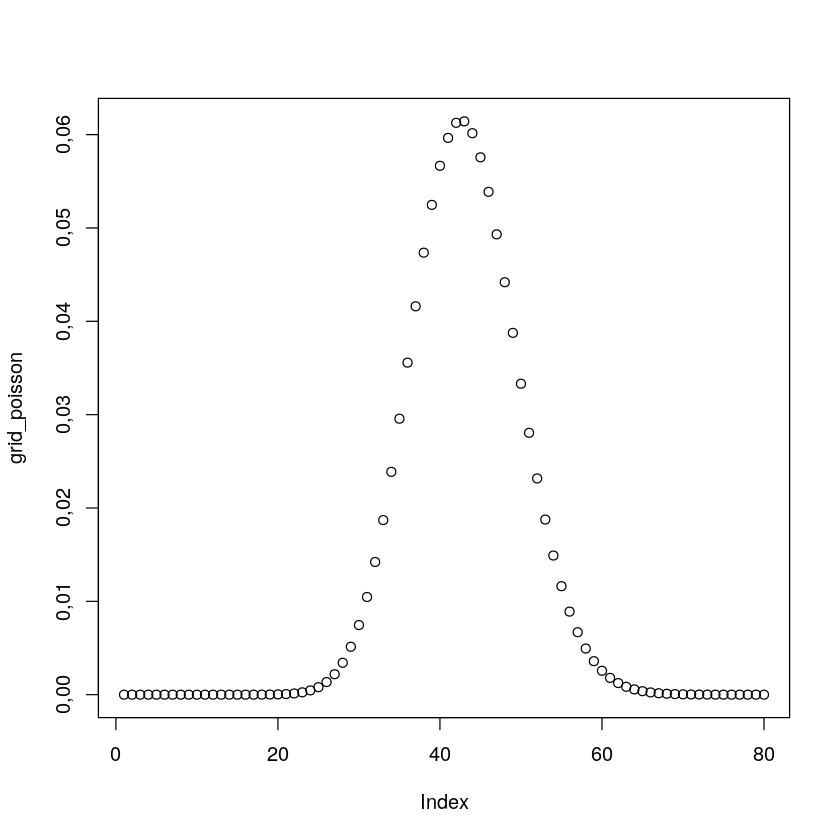

In [42]:
grid_poisson <- numeric(80)
for(k in 0:79){
    grid_poisson[k+1] <- poissonPMF(theta_n100, k)
}

# Chequeo valores:
sum(grid_poisson)
plot(grid_poisson)

In [43]:
binomialPMF <- function(n, p, k){
    return (choose(n, k) * p^k * (1-p)^(n-k))
}

# Probas estimadas:
p_hat_n5 <- theta_n5 / 1400
p_hat_n50 <- theta_n50 / 1400
p_hat_n100 <- theta_n100 / 1400

p_hat_n5
p_hat_n50
p_hat_n100

[1] 0,028

[1] 0,02935714

[1] 0,03007857

In [44]:
binomialPMF(1440, p_hat_n5, 40)
binomialPMF(1440, p_hat_n50, 40)
binomialPMF(1440, p_hat_n100, 40)

[1] 0,06375628

[1] 0,05987292

[1] 0,05583354

Y si uso segundos en vez de minutos

86400 segundos por dia

In [45]:
# Probas estimadas en segundos
p_hat_n5 <- theta_n5 / 86400
p_hat_n50 <- theta_n50 / 86400
p_hat_n100 <- theta_n100 / 86400

p_hat_n5
p_hat_n50
p_hat_n100

[1] 0,0004537037

[1] 0,0004756944

[1] 0,0004873843

In [46]:
binomialPMF(86400, p_hat_n5, 40)
binomialPMF(86400, p_hat_n50, 40)
binomialPMF(86400, p_hat_n100, 40)

[1] 0,06245294

[1] 0,0620329

[1] 0,05966413

Me decido por usar esta última **distancia de intervalo de 1 segundo**, ya que produce un ajuste más fino, con **menor probabilidad de que dos eventos ocurran en el mismo intervalo de tiempo**.

$$P(X_i, X_j \in [1 \ segundo]) << P(X_i, X_j \in [1 \ minuto]) << P(X_i, X_j \in [1 \ hora])$$